Amplitude=0.009602359743785887, Angular freq.=0.015785989162705908, phase=0.1580735231611825, offset=-0.0014586309744883178, Max. Cov.=[[ 1.43891961e-05 -1.41056709e-05  1.26180271e-03 -1.46666927e-05]
 [-1.41056709e-05  1.38839042e-05 -1.24197609e-03  1.43980156e-05]
 [ 1.26180271e-03 -1.24197609e-03  1.11208129e-01 -1.28795337e-03]
 [-1.46666927e-05  1.43980156e-05 -1.28795337e-03  1.49616316e-05]]
Errore Amp
0.0037933093911529203
Errore freq
0.003726111130388824
Errore phase
0.33347882866632106
Errore offset
0.0038680268325872497
Amplitude=0.009675808644557688, Angular freq.=0.015547394440543028, phase=-0.1805977576867896, offset=0.0016446763939560519, Max. Cov.=[[ 4.72941535e-05 -4.48993924e-05 -4.00823553e-03  4.81218583e-05]
 [-4.48993924e-05  4.27818341e-05  3.81941954e-03 -4.57411832e-05]
 [-4.00823553e-03  3.81941954e-03  3.41280337e-01 -4.08344612e-03]
 [ 4.81218583e-05 -4.57411832e-05 -4.08344612e-03  4.89970619e-05]]
Errore Amp
0.00687707448760046
Errore freq
0.006540782376

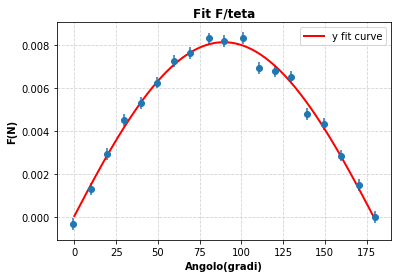

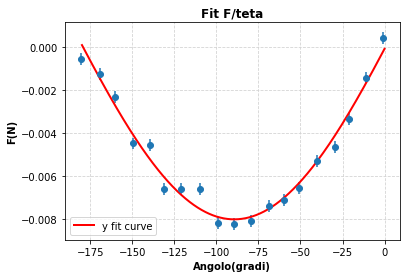

Amplitude=0.00815252306014372, Angular freq.=0.017506580916203225, phase=-0.0008989778291950571, offset=2.4968902712002427e-05, Max. Cov.=[[9.05380845e-09 2.17847570e-09 7.16140614e-09 1.61215801e-11]
 [2.17847570e-09 9.48238007e-09 5.77212541e-09 8.08202424e-12]
 [7.16140614e-09 5.77212541e-09 1.15214144e-04 2.14179332e-09]
 [1.61215801e-11 8.08202424e-12 2.14179332e-09 4.04021919e-09]]
Errore Amp
9.515150260728202e-05
Errore freq
9.737751315353683e-05
Errore phase
0.010733785176187746
Errore offset
6.356271856526676e-05


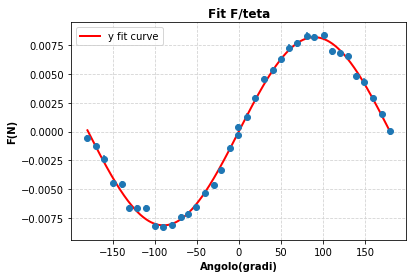

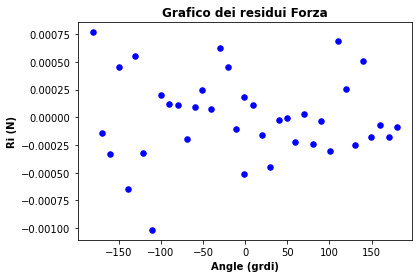

sigma_post_fit
0.00038078411496874747


In [104]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = np.array(tt)
    yy = np.array(yy)
    ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(np.fft.fft(yy))
    guess_freq = abs(ff[np.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = np.std(yy) * 2.**0.5
    guess_offset = np.mean(yy)
    guess = np.array([guess_amp, 2.*np.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * np.sin(w*t + p) + c
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*np.pi)
    fitfunc = lambda t: A * np.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "cov": pcov, "rawres": (guess,popt,pcov)}



F = np.array([0,0.001405855646,0.00276899508,0.004048,0.005204008488,0.006201895811,0.007011341669,0.007607751458,0.007973003568,0.008096,0.007973003568,0.007607751458,0.007011341669,0.006201895811,0.005204008488,0.004048,0.00276899508,0.001405855646,0])
#sto considerando un errore di 0.014*2 forse è da mettere 0.03*2 ma poi il grafico
#viene sballato, e non sono errori massimi da dividere per 3 ma sigma visto
#che sono ricavati dalle sigma post_fit della taratura, quindi forse l'errore
#che ci dobbiamo aspettare è di 0.014 su ogni misura
F = F-np.random.normal(0, 0.028*0.0098, 19)
#per il fit aggiungere F qui sotto decommentando
#F = np.array([0,0.001405855646,0.00276899508,0.004048,0.005204008488,0.006201895811,0.007011341669,0.007607751458,0.007973003568,0.008096,0.007973003568,0.007607751458,0.007011341669,0.006201895811,0.005204008488,0.004048,0.00276899508,0.001405855646,0])
F_err = np.ones(19)*0.0002744
Angle = np.arange(0,181,10)
#per il fit commentare questa riga
Angle = Angle-np.random.normal(0, 0.5, 19)
Angle_err = np.ones(19)*0.5


fig = plt.figure()
ax = fig.gca()

plt.title("Fit F/teta",fontweight="bold")
plt.xlabel("Angolo(gradi)",fontweight="bold")
plt.ylabel("F(N)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.errorbar(Angle, F, xerr=Angle_err, yerr=F_err, fmt='o')





res = fit_sin(Angle, F)
print( "Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s, offset=%(offset)s, Max. Cov.=%(cov)s" % res )
err = np.sqrt(np.diag(res["cov"]))
print("Errore Amp")
print(err[0])
print("Errore freq")
print(err[1])
print("Errore phase")
print(err[2])
print("Errore offset")
print(err[3])

x = np.linspace(0,180,1000)

plt.plot(x, res["fitfunc"](x), "r-", label="y fit curve", linewidth=2)
plt.legend(loc="best")







F2 = np.array([0,0.001405855646,0.00276899508,0.004048,0.005204008488,0.006201895811,0.007011341669,0.007607751458,0.007973003568,0.008096,0.007973003568,0.007607751458,0.007011341669,0.006201895811,0.005204008488,0.004048,0.00276899508,0.001405855646,0])
#per il fit commentare le prossime 2 righe
F2 = F*-1
F2 = F2-np.random.normal(0, 0.028*0.0098, 19)
#per il fit aggiungere F qui sotto decommentando
#F2 = np.array([0,0.001405855646,0.00276899508,0.004048,0.005204008488,0.006201895811,0.007011341669,0.007607751458,0.007973003568,0.008096,0.007973003568,0.007607751458,0.007011341669,0.006201895811,0.005204008488,0.004048,0.00276899508,0.001405855646,0])
F_err = np.ones(19)*0.0002744
Angle2 = np.arange(0,-181,-10)
#per il fit commentare questa riga
Angle2 = Angle2-np.random.normal(0, 0.5, 19)
Angle_err = np.ones(19)*0.5
res = fit_sin(Angle2, F2)
print( "Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s, offset=%(offset)s, Max. Cov.=%(cov)s" % res )
err = np.sqrt(np.diag(res["cov"]))
print("Errore Amp")
print(err[0])
print("Errore freq")
print(err[1])
print("Errore phase")
print(err[2])
print("Errore offset")
print(err[3])

fig = plt.figure()
ax = fig.gca()

plt.title("Fit F/teta",fontweight="bold")
plt.xlabel("Angolo(gradi)",fontweight="bold")
plt.ylabel("F(N)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.errorbar(Angle2, F2, xerr=Angle_err, yerr=F_err, fmt='o')


x = np.linspace(0,-180,1000)

plt.plot(x, res["fitfunc"](x), "r-", label="y fit curve", linewidth=2)
plt.legend(loc="best")
plt.show()


Ftot = np.concatenate([F,F2])
#per il fit aggiungere F qui sotto decommentando
#F2 = np.array([0,0.001405855646,0.00276899508,0.004048,0.005204008488,0.006201895811,0.007011341669,0.007607751458,0.007973003568,0.008096,0.007973003568,0.007607751458,0.007011341669,0.006201895811,0.005204008488,0.004048,0.00276899508,0.001405855646,0])
F_err = np.concatenate([F_err,F_err])
#per il fit commentare questa riga
Angletot = np.concatenate([Angle,Angle2])
Angle_err = np.ones(38)*0.5

res = fit_sin(Angletot, Ftot)
print( "Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s, offset=%(offset)s, Max. Cov.=%(cov)s" % res )
err = np.sqrt(np.diag(res["cov"]))
print("Errore Amp")
print(err[0])
print("Errore freq")
print(err[1])
print("Errore phase")
print(err[2])
print("Errore offset")
print(err[3])

fig = plt.figure()
ax = fig.gca()

plt.title("Fit F/teta",fontweight="bold")
plt.xlabel("Angolo(gradi)",fontweight="bold")
plt.ylabel("F(N)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.errorbar(Angletot, Ftot, xerr=Angle_err, yerr=F_err, fmt='o')


x = np.linspace(-180,180,1000)
A = res["amp"]
phi = res["phase"]
c = res["offset"]
w = res["omega"]


Ff = res["fitfunc"](Angletot)
plt.plot(x, res["fitfunc"](x), "r-", label="y fit curve", linewidth=2)

plt.legend(loc="best")
plt.show()





Ri = Ff-Ftot

fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui Forza",fontweight="bold")
plt.xlabel("Angle (grdi)",fontweight="bold")
plt.ylabel("Ri (N)",fontweight="bold")
plt.plot(np.linspace(0,0.1,1000),np.zeros(1000))
plt.scatter(Angletot,Ri, s=30, color='blue',zorder=3)

plt.show()


sigma_post_fit = (np.sum((Ff-Ftot)**2)/(len(Ff)-2))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)

